In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [0]:
path = "dbfs:/mnt/lsde/group05/statistics/new-posts-posters.parquet"

In [0]:
df = spark.read.load(path,format="parquet")

In [0]:
df.show()

+---------+-------------+-----------+
 date|count_posters|count_posts|
+---------+-------------+-----------+
2020-0901| 856| 1094|
2020-0902| 1653| 2145|
2020-0903| 2285| 2533|
2020-0904| 1428| 1568|
2020-0905| 2357| 3122|
2020-0906| 1884| 2306|
2020-0907| 1422| 1603|
2020-0908| 1305| 1398|
2020-0909| 1469| 1682|
2020-0910| 1528| 1727|
2020-0911| 1296| 1509|
2020-0912| 1335| 1520|
2020-0913| 1075| 1271|
2020-0914| 1232| 1339|
2020-0915| 2949| 3207|
2020-0916| 1224| 1326|
2020-0917| 1337| 1426|
2020-0918| 1863| 2104|
2020-0919| 1027| 1153|
2020-0920| 1337| 1599|
+---------+-------------+-----------+
only showing top 20 rows

In [0]:
df =df.orderBy('date',ascending=True)

In [0]:
df.show() # count of posts and posters

+---------+-------------+-----------+
 date|count_posters|count_posts|
+---------+-------------+-----------+
2014-0201| 108| 121|
2014-0201| 241| 246|
2014-0202| 120| 132|
2014-0202| 310| 316|
2014-0203| 126| 139|
2014-0203| 875| 897|
2014-0204| 229| 252|
2014-0204| 829| 864|
2014-0205| 805| 863|
2014-0205| 359| 380|
2014-0206| 186| 210|
2014-0206| 449| 463|
2014-0207| 902| 924|
2014-0207| 316| 369|
2014-0208| 760| 823|
2014-0208| 285| 318|
2014-0209| 186| 208|
2014-0209| 477| 506|
2014-0210| 651| 684|
2014-0210| 197| 224|
+---------+-------------+-----------+
only showing top 20 rows

In [0]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

In [0]:
data=df.toPandas()

In [0]:
data

Out[9]:

,date,count_posters,count_posts
0,2014-0201,108,121
1,2014-0201,241,246
2,2014-0202,120,132
3,2014-0202,310,316
4,2014-0203,126,139
...,...,...,...
8501,2022-0830,20,24
8502,2022-0830,5862,7516
8503,2022-0831,725,1504
8504,2022-0831,25,28


In [0]:
import pandas as pd 
import numpy as np

In [0]:
def handledate(date):
    return date[0:7]+"-"+date[-2:]

In [0]:
handledate("2014-0202")

Out[12]: '2014-02-02'

In [0]:
data['newdate'] = data['date'].apply(handledate)
#data.set_index("date", inplace=True)

In [0]:
newdata =data[['count_posters','count_posts','newdate']]

In [0]:
newdata

Out[15]:

,count_posters,count_posts,newdate
0,108,121,2014-02-01
1,241,246,2014-02-01
2,120,132,2014-02-02
3,310,316,2014-02-02
4,126,139,2014-02-03
...,...,...,...
8501,20,24,2022-08-30
8502,5862,7516,2022-08-30
8503,725,1504,2022-08-31
8504,25,28,2022-08-31


In [0]:
newdata['date'] = pd.to_datetime(newdata['newdate'])
newdata.set_index("date", inplace=True)

In [0]:
newdata

Out[17]:

,count_posters,count_posts,newdate
date,,,
2014-02-01,108,121,2014-02-01
2014-02-01,241,246,2014-02-01
2014-02-02,120,132,2014-02-02
2014-02-02,310,316,2014-02-02
2014-02-03,126,139,2014-02-03
...,...,...,...
2022-08-30,20,24,2022-08-30
2022-08-30,5862,7516,2022-08-30
2022-08-31,725,1504,2022-08-31


Out[18]:

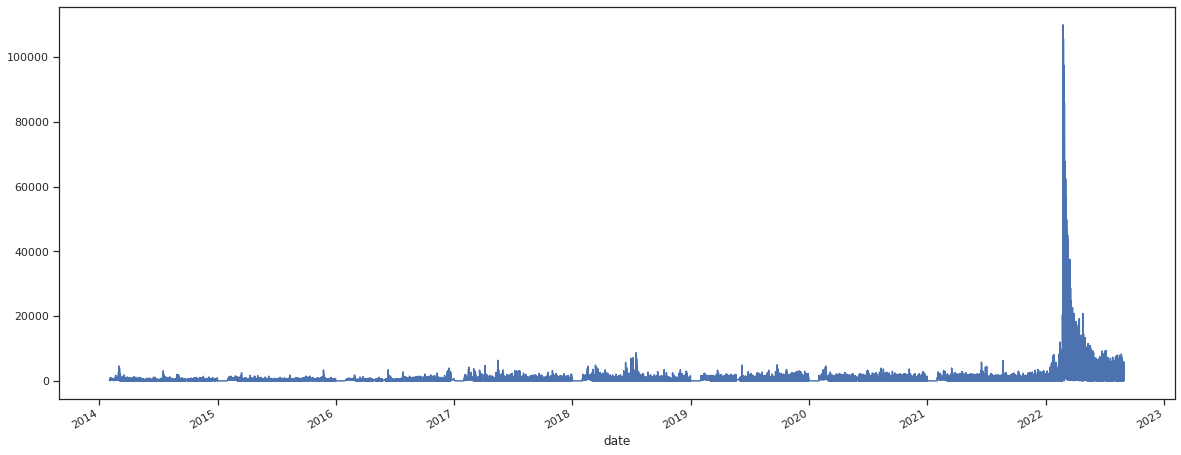

<AxesSubplot:xlabel='date'>

In [0]:
newdata['count_posters'].plot(figsize=(20, 8)) # count of posters 

Out[19]:

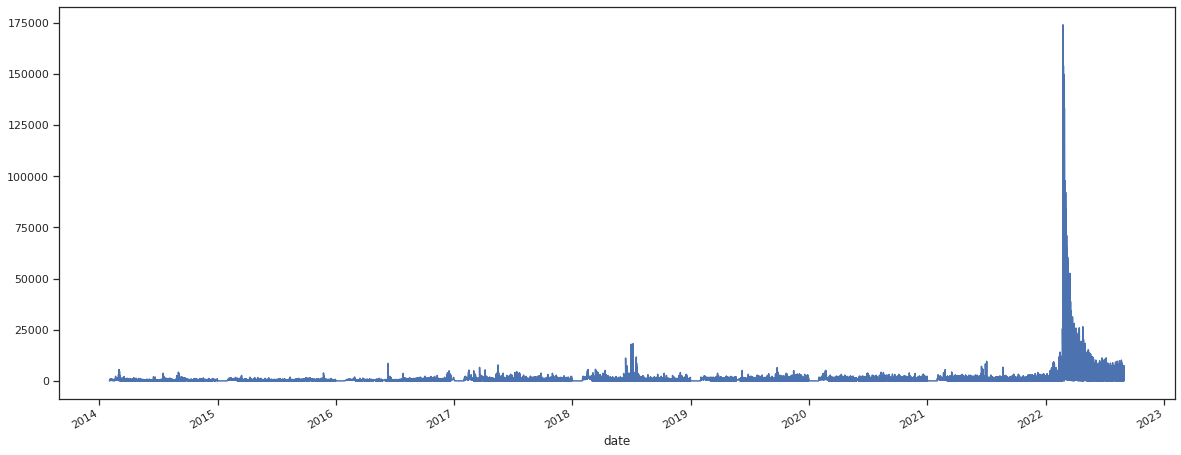

<AxesSubplot:xlabel='date'>

In [0]:
newdata['count_posts'].plot(figsize=(20, 8)) # count of posts

In [0]:
poster_df=newdata[['count_posters']]

In [0]:
poster_df.head()

Out[21]:

,count_posters
date,
2014-02-01,108
2014-02-01,241
2014-02-02,120
2014-02-02,310
2014-02-03,126


In [0]:
posts_df=newdata[['count_posts']]

In [0]:
posts_df.head()

Out[23]:

,count_posts
date,
2014-02-01,121
2014-02-01,246
2014-02-02,132
2014-02-02,316
2014-02-03,139


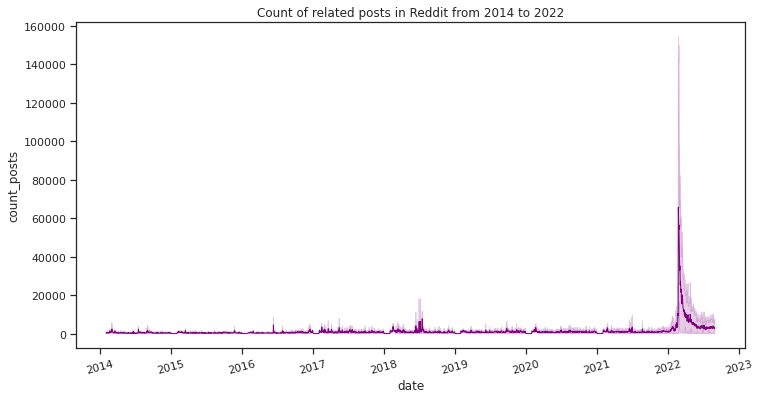

In [0]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='count_posts',data=posts_df, linewidth=1, color='purple').set(title='Count of related posts in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15)
plt.show()

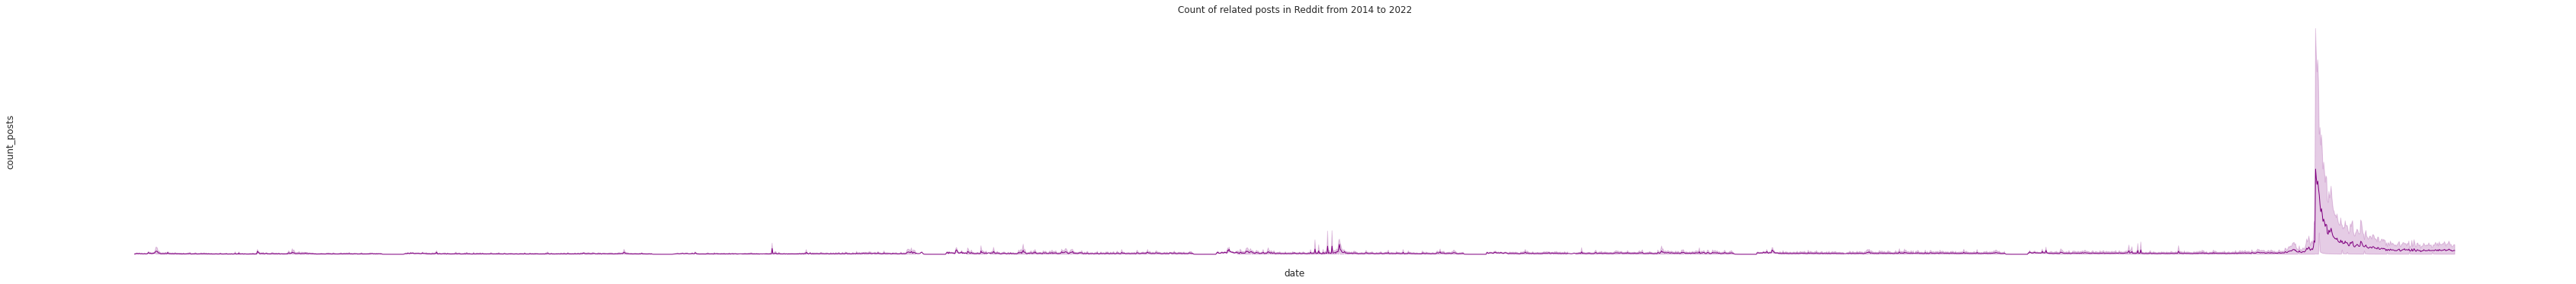

--------------------------------------------------------------------------- 
 FileNotFoundError Traceback (most recent call last)
 <command-71886364993404> in <module> 
 8 
 9 plt . show ( ) 
 ---> 10 plt . savefig ( 'dbfs/mnt/lsde/group05/data-visulization-output/posts-count.png' , edgecolor = 'black' , dpi = 400 , facecolor = 'black' , transparent = True ) 

 /databricks/python/lib/python3.8/site-packages/matplotlib/pyplot.py in savefig (*args, **kwargs) 
 964 def savefig ( * args , ** kwargs ) : 
 965 fig = gcf ( ) 
 --> 966 res = fig . savefig ( * args , ** kwargs ) 
 967 fig . canvas . draw_idle ( ) # need this if 'transparent=True' to reset colors 
 968 return res

 /databricks/python/lib/python3.8/site-packages/matplotlib/figure.py in savefig (self, fname, transparent, **kwargs) 
 3003 patch . set_edgecolor ( 'none' ) 
 3004 
 -> 3005 self . canvas . print_figure ( fname , ** kwargs ) 
 3006 
 3007 if transparent : 

 /databricks/python/lib/python3.8/site-packages/matplotlib/backend_bases.py in print_figure (self, filename, dpi, facecolor, edgecolor, orientation, format, bbox_inches, pad_inches, bbox_extra_artists, backend, **kwargs) 
 2253 # force the figure dpi to 72), so we need to set it again here. 
 2254 with cbook . _setattr_cm ( self . figure , dpi = dpi ) : 
 -> 2255 result = print_method(
 2256 filename , 
 2257 facecolor = facecolor , 

 /databricks/python/lib/python3.8/site-packages/matplotlib/backend_bases.py in wrapper (*args, **kwargs) 
 1667 kwargs . pop ( arg ) 
 1668 
 -> 1669 return func ( * args , ** kwargs ) 
 1670 
 1671 return wrapper

 /databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py in print_png (self, filename_or_obj, metadata, pil_kwargs, *args) 
 507 """
 508 FigureCanvasAgg . draw ( self ) 
 --> 509 mpl.image.imsave(
 510 filename_or_obj , self . buffer_rgba ( ) , format = "png" , origin = "upper" , 
 511 dpi=self.figure.dpi, metadata=metadata, pil_kwargs=pil_kwargs)

 /databricks/python/lib/python3.8/site-packages/matplotlib/image.py in imsave (fname, arr, vmin, vmax, cmap, format, origin, dpi, metadata, pil_kwargs) 
 1614 pil_kwargs . setdefault ( "format" , format ) 
 1615 pil_kwargs . setdefault ( "dpi" , ( dpi , dpi ) ) 
 -> 1616 image . save ( fname , ** pil_kwargs ) 
 1617 
 1618 

 /databricks/python/lib/python3.8/site-packages/PIL/Image.py in save (self, fp, format, **params) 
 2167 fp = builtins . open ( filename , "r+b" ) 
 2168 else : 
 -> 2169 fp = builtins . open ( filename , "w+b" ) 
 2170 
 2171 try : 

 FileNotFoundError : [Errno 2] No such file or directory: 'dbfs/mnt/lsde/group05/data-visulization-output/posts-count.png'

In [0]:
fig=plt.figure(figsize=(60,6))
sns.lineplot(x='date',y='count_posts',data=posts_df, linewidth=1, color='purple').set(title='Count of related posts in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
#plt.xticks(rotation=15)
plt.xticks([])
plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()
plt.savefig('dbfs/mnt/lsde/group05/data-visulization-output/posts-count.png',edgecolor='black', dpi=400, facecolor='black', transparent=True)

In [0]:
from io import BytesIO

In [0]:
fig=plt.figure(figsize=(60,6))
sns.lineplot(x='date',y='count_posts',data=posts_df, linewidth=1, color='purple').set(title='Count of related posts in Reddit from 2014 to 2022')

#plt.xticks(rotation=15)
plt.xticks([])
plt.yticks([])
sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()
#plt.savefig('dbfs/mnt/lsde/group05/data-visulization-output/posts-count.png',edgecolor='black', dpi=400, facecolor='black', transparent=True)



# Create a plt or fig, then:
buf = BytesIO()
plt.savefig(buf, format='png',edgecolor='black', dpi=400, facecolor='black', transparent=True)

path = 'dbfs/mnt/lsde/group05/data-visulization-output/posts-count.png'

# Make sure to open the file in bytes mode
with open(path, 'wb') as f:
  # You can also use Bytes.IO.seek(0) then BytesIO.read()
  f.write(buf.getvalue())

In [0]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='count_posters',data=poster_df, linewidth=1, color='purple').set(title='Count of related posters in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
plt.xticks(rotation=15)
plt.show()




In [0]:
pip install -U seaborn

In [0]:
comment_sentiment_path ="dbfs:/mnt/lsde/group05/statistics/sentiment.parquet"

In [0]:
comment_sentiment = spark.read.load(comment_sentiment_path,format="parquet")

In [0]:
comment_sentiment.show()

In [0]:
from pyspark.sql import functions as sf

In [0]:
comment_sentiment_daysum = comment_sentiment.groupBy('date').agg(sf.sum('sentiment-counts').alias('sentiment-daysum')).orderBy('date')

In [0]:
comment_sentiment_daysum.show()

+---------+----------------+
 date|sentiment-daysum|
+---------+----------------+
2014-0201| 246|
2014-0202| 316|
2014-0203| 897|
2014-0204| 864|
2014-0205| 863|
2014-0206| 463|
2014-0207| 924|
2014-0208| 823|
2014-0209| 506|
2014-0210| 684|
2014-0211| 779|
2014-0212| 464|
2014-0213| 406|
2014-0214| 677|
2014-0215| 710|
2014-0216| 500|
2014-0217| 404|
2014-0218| 587|
2014-0219| 1168|
2014-0220| 2233|
+---------+----------------+
only showing top 20 rows

In [0]:
tmp = comment_sentiment.join(comment_sentiment_daysum,"date").select(comment_sentiment.date,"result","sentiment-counts","sentiment-daysum")
overall_comment_sentiment = tmp.withColumn('ratio',100*sf.col("sentiment-counts")/sf.col("sentiment-daysum")).orderBy('date')
overall_comment_sentiment.show()

+---------+--------+----------------+----------------+------------------+
 date| result|sentiment-counts|sentiment-daysum| ratio|
+---------+--------+----------------+----------------+------------------+
2014-0201| joy| 34| 246|13.821138211382113|
2014-0201| fear| 127| 246| 51.6260162601626|
2014-0201|surprise| 42| 246|17.073170731707318|
2014-0201| sadness| 43| 246|17.479674796747968|
2014-0202|surprise| 69| 316|21.835443037974684|
2014-0202| sadness| 56| 316| 17.72151898734177|
2014-0202| joy| 39| 316|12.341772151898734|
2014-0202| fear| 152| 316| 48.10126582278481|
2014-0203| fear| 322| 897| 35.8974358974359|
2014-0203| sadness| 212| 897| 23.63433667781494|
2014-0203|surprise| 210| 897|23.411371237458194|
2014-0203| joy| 153| 897| 17.05685618729097|
2014-0204| sadness| 158| 864|18.287037037037038|
2014-0204| joy| 86| 864| 9.953703703703704|
2014-0204|surprise| 157| 864|18.171296296296298|
2014-0204| fear| 463| 864| 53.58796296296296|
2014-0205| sadness| 227| 863| 26.30359212050985|
2014-0205| joy| 95| 863| 11.00811123986095|
2014-0205|surprise| 185| 863|21.436848203939746|
2014-0205| fear| 356| 863|41.251448435689454|
+---------+--------+----------------+----------------+------------------+
only showing top 20 rows

In [0]:
overall_comment_sentiment_df =overall_comment_sentiment.toPandas()

In [0]:
overall_comment_sentiment_df['newdate'] = overall_comment_sentiment_df['date'].apply(handledate)

In [0]:
overall_comment_sentiment_df['date'] = pd.to_datetime(overall_comment_sentiment_df['newdate'])
overall_comment_sentiment_df.set_index("date", inplace=True)

In [0]:
overall_comment_sentiment_df.head()

Out[35]:

,result,sentiment-counts,sentiment-daysum,ratio,newdate
date,,,,,
2014-02-01,surprise,42,246,17.073171,2014-02-01
2014-02-01,sadness,43,246,17.479675,2014-02-01
2014-02-01,joy,34,246,13.821138,2014-02-01
2014-02-01,fear,127,246,51.626016,2014-02-01
2014-02-02,surprise,69,316,21.835443,2014-02-02


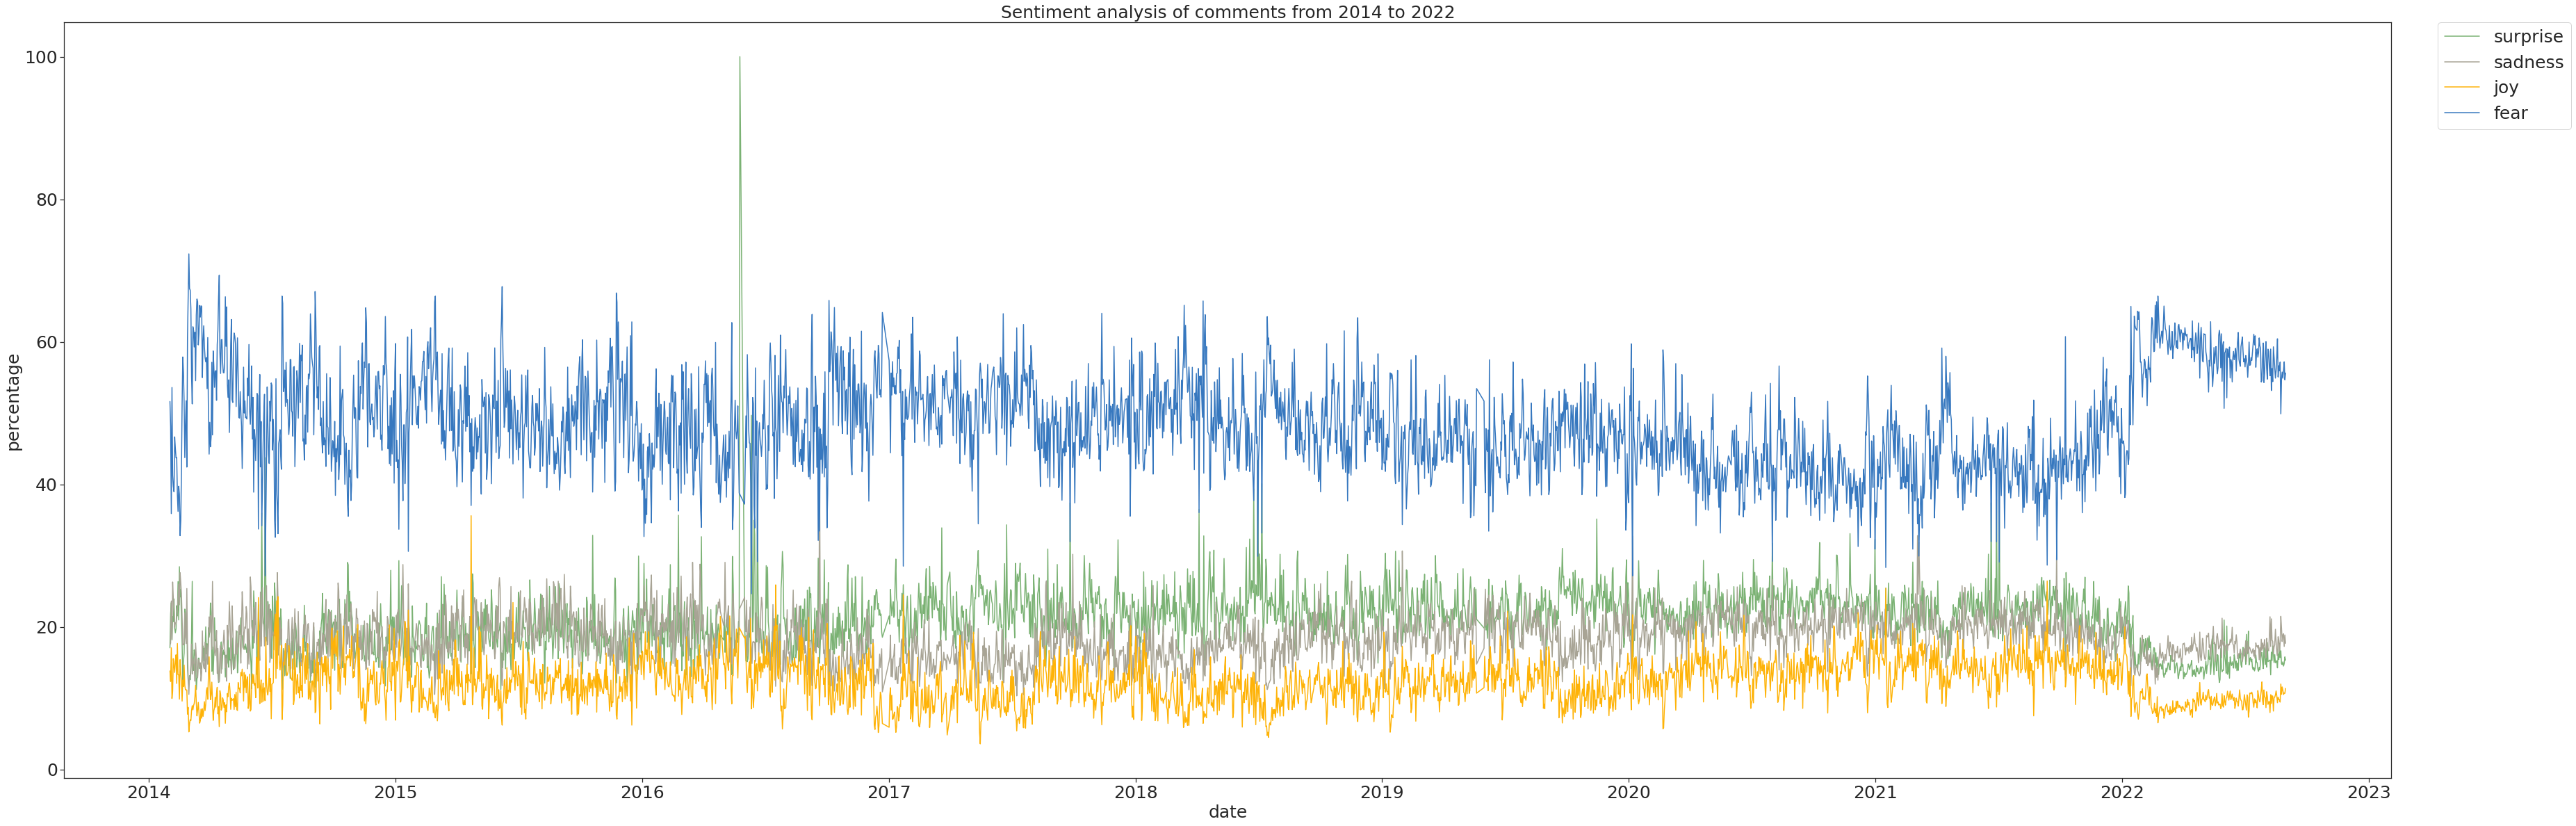

In [0]:
f, ax = plt.subplots(figsize=(60, 20))

#sns.despine(top=True, right=True, left=True, bottom=True)
#palette = sns.xkcd_palette(["windows blue", "amber", "greyish", "faded green"])
palette = sns.xkcd_palette([ "faded green","greyish","amber","windows blue"])
sns.lineplot(x='date', y='ratio', hue='result', data=overall_comment_sentiment_df,palette = palette)
#plt.xticks([])
#plt.yticks([])
plt.xticks(size=25)
plt.yticks(size =25)
plt.xlabel('date',fontsize=25)
plt.ylabel('percentage',fontsize=25)
plt.title( 'Sentiment analysis of comments from 2014 to 2022',fontsize=25)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0,fontsize=25)
#plt.title('Sentiment analysis of comments from 2014 to 2022',)
plt.show()

In [0]:
comment_sentiment_df = comment_sentiment.toPandas()

In [0]:
comment_sentiment_df

In [0]:
comment_sentiment_df['newdate'] = comment_sentiment_df['date'].apply(handledate)

In [0]:
comment_sentiment_df.head()

In [0]:
comment_sentiment_df['date'] = pd.to_datetime(comment_sentiment_df['newdate'])
comment_sentiment_df.set_index("date", inplace=True)

In [0]:
comment_sentiment_df.head()

In [0]:
comment_sentiment_df =comment_sentiment_df[['result','sentiment-counts']]

In [0]:
comment_sentiment_df

In [0]:
f, ax = plt.subplots(figsize=(60, 20))
sns.despine(f)
sns.lineplot(x='date', y='sentiment-counts', hue='result', data=comment_sentiment_df)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Sentiment analysis of comments from 2014 to 2022')
plt.show()

In [0]:
diamonds